
Google Play Store Apps — Data Cleaning & Exploratory Data Analysis (EDA)

This project analyzes Google Play Store apps to understand patterns in ratings, reviews, installs, pricing, genres, and categories.
We perform full data cleaning, visualization, and extract actionable insights for developers and business teams.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')
sns.set_palette("viridis")


In [19]:
import os

# Create folder if it doesn't exist
os.makedirs("plots", exist_ok=True)


📌 Load the Dataset

We load two datasets:

googleplaystore.csv: Main app data

googleplaystore_user_reviews.csv: User reviews (optional)

In [2]:
df = pd.read_csv("googleplaystore.csv")
reviews_df = pd.read_csv("googleplaystore_user_reviews.csv")

df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


📌 Basic Exploration

We preview the dataset shape, structure, and descriptive statistics.

In [3]:
print(df.shape)
print(df.info())
df.describe(include='all').T


(10841, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
App,10841,9660,ROBLOX,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,10841,34,FAMILY,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9367.0,NaN,NaN,NaN,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0
Reviews,10841,6002,0,596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,10841,462,Varies with device,1695,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Installs,10841,22,"1,000,000+",1579,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,10840,3,Free,10039,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,10841,93,0,10040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Content Rating,10840,6,Everyone,8714,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genres,10841,120,Tools,842,NaN,NaN,NaN,NaN,NaN,NaN,NaN


📌 Data Cleaning Steps

Google Play Store dataset contains:

Missing values

Duplicates

Text-based numeric fields (Installs, Reviews, Price, Size)

Irregular size formats (e.g., "19M", "300k", "Varies with device")

We clean all these columns and create a cleaned dataframe.

In [4]:
df = df.copy()

# Remove duplicates
df.drop_duplicates(inplace=True)

# Clean Reviews
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Clean Installs
df['Installs'] = df['Installs'].str.replace('+', '', regex=False).str.replace(',', '', regex=False)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

# Clean Price
df['Price'] = df['Price'].str.replace('$', '', regex=False)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Clean Size column
def convert_size(x):
    if 'M' in x:
        return float(x.replace('M','')) * 1_000_000
    elif 'k' in x or 'K' in x:
        return float(x.replace('k','').replace('K','')) * 1_000
    else:
        return np.nan

df['Size'] = df['Size'].replace('Varies with device', np.nan)
df['Size'] = df['Size'].astype(str).apply(convert_size)

# Clean Rating
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Remove rows missing critical fields
df_clean = df.dropna(subset=['App','Category'])

df_clean.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700000.0,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000000.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800000.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up



📌 Check Remaining Missing Values

In [5]:
df_clean.isnull().sum()


App                  0
Category             0
Rating            1465
Reviews              1
Size              1527
Installs             1
Type                 1
Price                1
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

📌 Visualization 1: Distribution of Ratings

Shows how app ratings are distributed.

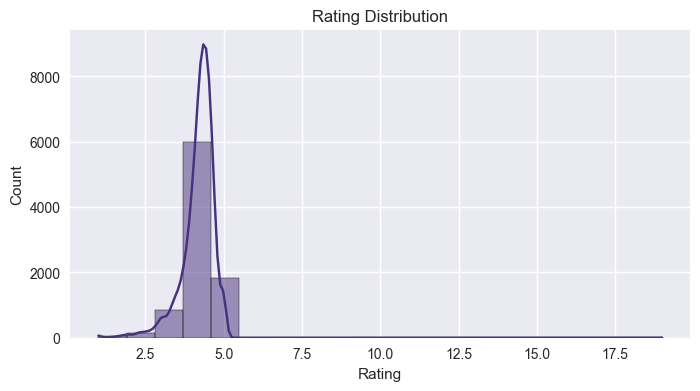

In [6]:
plt.figure(figsize=(8,4))
sns.histplot(df_clean['Rating'], bins=20, kde=True)
plt.title("Rating Distribution")
plt.show()



📌 Visualization 2: Apps by Category

Shows which app categories dominate the Play Store.

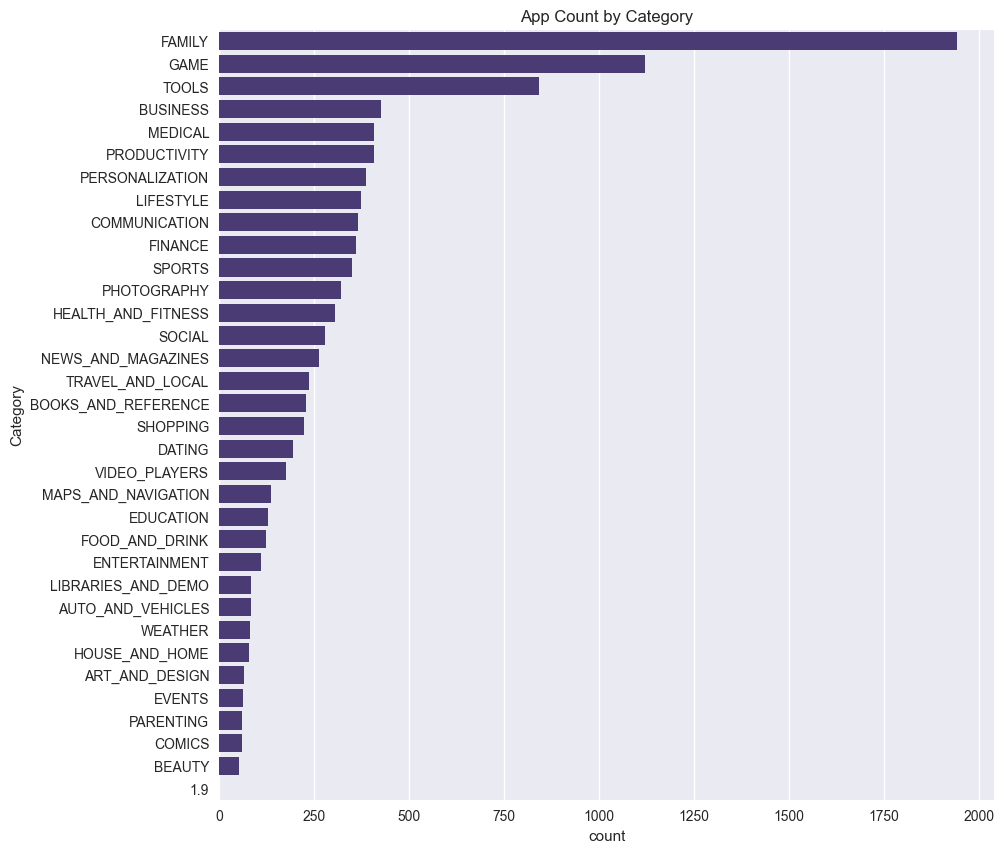

In [7]:
plt.figure(figsize=(10,10))
sns.countplot(y='Category', data=df_clean,
              order=df_clean['Category'].value_counts().index)
plt.title("App Count by Category")
plt.show()



📌 Visualization 3: Installs vs Rating

Shows how app popularity relates to ratings.

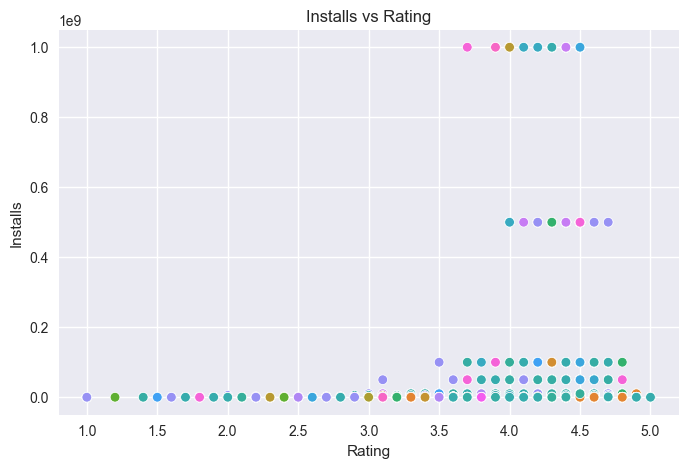

In [8]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Rating', y='Installs', data=df_clean,
                hue='Category', legend=False)
plt.title("Installs vs Rating")
plt.show()



📌 Top 10 Most Installed Apps

In [9]:
top_installed = df_clean[['App','Installs']].sort_values(by='Installs', ascending=False).head(10)
top_installed


,App,Installs
3454,Google Drive,1.000000e+09
865,Google Play Games,1.000000e+09
3523,Google Drive,1.000000e+09
2544,Facebook,1.000000e+09
2545,Instagram,1.000000e+09
464,Hangouts,1.000000e+09
3223,Maps - Navigate & Explore,1.000000e+09
3816,Google News,1.000000e+09
4170,Google Drive,1.000000e+09
3896,Subway Surfers,1.000000e+09


📌 Average Rating per Category

In [10]:
avg_rating = df_clean.groupby('Category')['Rating'].mean().sort_values(ascending=False)
avg_rating


Category
1.9                    19.000000
EVENTS                  4.435556
EDUCATION               4.375969
ART_AND_DESIGN          4.358065
BOOKS_AND_REFERENCE     4.347458
PERSONALIZATION         4.333871
PARENTING               4.300000
GAME                    4.281285
BEAUTY                  4.278571
HEALTH_AND_FITNESS      4.261450
SOCIAL                  4.254918
SHOPPING                4.251485
WEATHER                 4.244000
SPORTS                  4.225175
PRODUCTIVITY            4.201796
FAMILY                  4.191153
AUTO_AND_VEHICLES       4.190411
PHOTOGRAPHY             4.182895
MEDICAL                 4.182450
LIBRARIES_AND_DEMO      4.178462
HOUSE_AND_HOME          4.164706
FOOD_AND_DRINK          4.164151
COMICS                  4.155172
COMMUNICATION           4.151466
ENTERTAINMENT           4.136036
NEWS_AND_MAGAZINES      4.128505
FINANCE                 4.127445
BUSINESS                4.102593
LIFESTYLE               4.096066
TRAVEL_AND_LOCAL        4.094146
V

Sentiment Analysis on User Reviews

We use TextBlob to compute polarity and subjectivity for each review.
This helps identify how users feel about different apps.

In [12]:
reviews = pd.read_csv("googleplaystore_user_reviews.csv")
reviews.head()


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


📌 Clean review text & remove missing entries

In [13]:
reviews = reviews.dropna(subset=['Translated_Review'])
reviews['Translated_Review'] = reviews['Translated_Review'].astype(str)


📌 Polarity & Subjectivity

Polarity → how positive/negative

Subjectivity → personal opinion vs factual

In [14]:
from textblob import TextBlob

def sentiment_polarity(text):
    return TextBlob(text).sentiment.polarity

def sentiment_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

reviews['Polarity'] = reviews['Translated_Review'].apply(sentiment_polarity)
reviews['Subjectivity'] = reviews['Translated_Review'].apply(sentiment_subjectivity)
reviews.head()


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Polarity,Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000,1.00,0.300000


📌 Create Positive / Neutral / Negative labels

In [15]:
def sentiment_label(score):
    if score > 0.1:
        return "Positive"
    elif score < -0.1:
        return "Negative"
    else:
        return "Neutral"

reviews['Sentiment'] = reviews['Polarity'].apply(sentiment_label)
reviews['Sentiment'].value_counts()


Sentiment
Positive    20625
Neutral     11119
Negative     5683
Name: count, dtype: int64

📌 Count of Review Sentiments

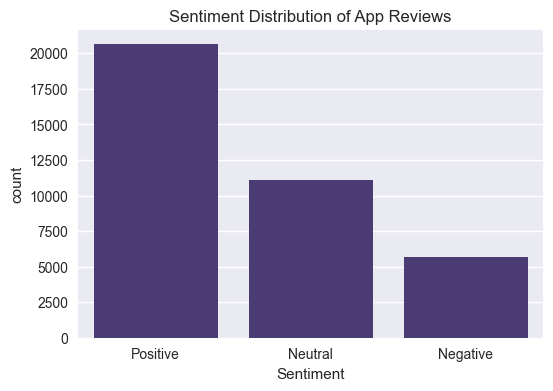

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(x='Sentiment', data=reviews)
plt.title("Sentiment Distribution of App Reviews")
plt.show()


📌 WordCloud of Positive & Negative Reviews

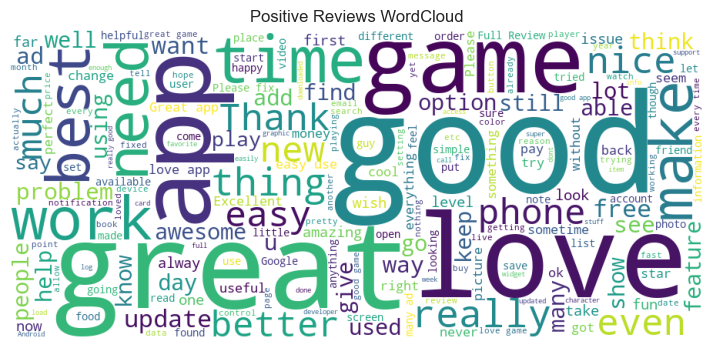

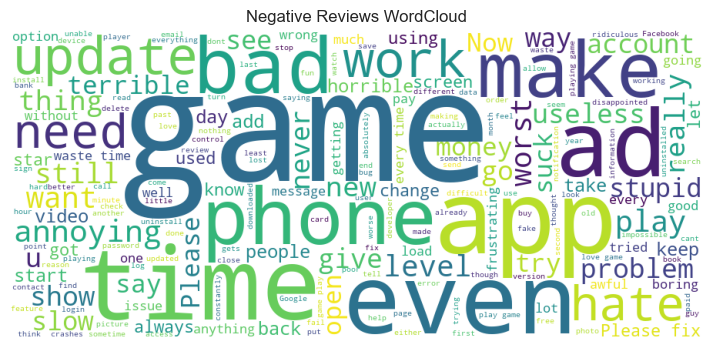

In [17]:
from wordcloud import WordCloud

# Positive
positive_reviews = " ".join(reviews[reviews['Sentiment']=="Positive"]['Translated_Review'])
wc_pos = WordCloud(width=900, height=400, background_color='white').generate(positive_reviews)

# Negative
negative_reviews = " ".join(reviews[reviews['Sentiment']=="Negative"]['Translated_Review'])
wc_neg = WordCloud(width=900, height=400, background_color='white').generate(negative_reviews)

plt.figure(figsize=(12,4))
plt.imshow(wc_pos)
plt.title("Positive Reviews WordCloud")
plt.axis("off")
plt.show()

plt.figure(figsize=(12,4))
plt.imshow(wc_neg)
plt.title("Negative Reviews WordCloud")
plt.axis("off")
plt.show()


Paid vs Free: Rating Comparison

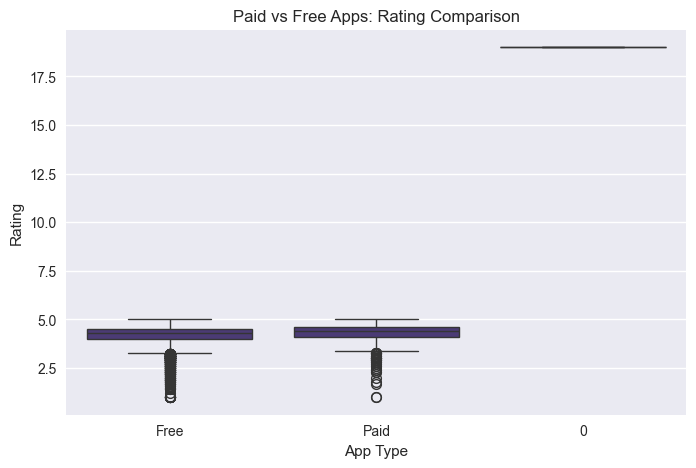

In [20]:
# Paid vs Free Rating Comparison
plt.figure(figsize=(8,5))
sns.boxplot(data=df_clean, x='Type', y='Rating')
plt.title("Paid vs Free Apps: Rating Comparison")
plt.xlabel("App Type")
plt.ylabel("Rating")
plt.savefig("plots/paid_vs_free_ratings.png", dpi=300, bbox_inches='tight')
plt.show()


Price vs Installs (Log Scale)

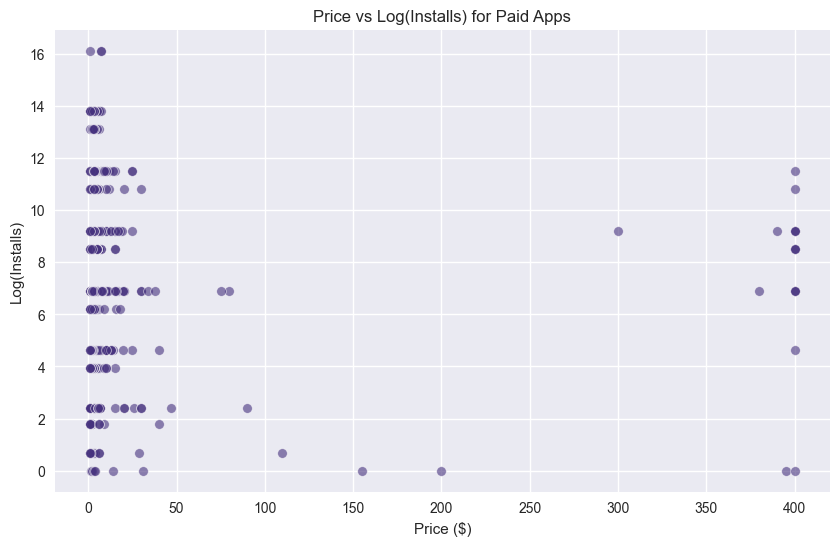

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_clean[df_clean['Price'] > 0],
    x='Price',
    y=np.log1p(df_clean[df_clean['Price'] > 0]['Installs']),
    alpha=0.6
)
plt.title("Price vs Log(Installs) for Paid Apps")
plt.xlabel("Price ($)")
plt.ylabel("Log(Installs)")
plt.savefig("plots/price_vs_installs.png", dpi=300, bbox_inches='tight')
plt.show()


Average Installs per Category

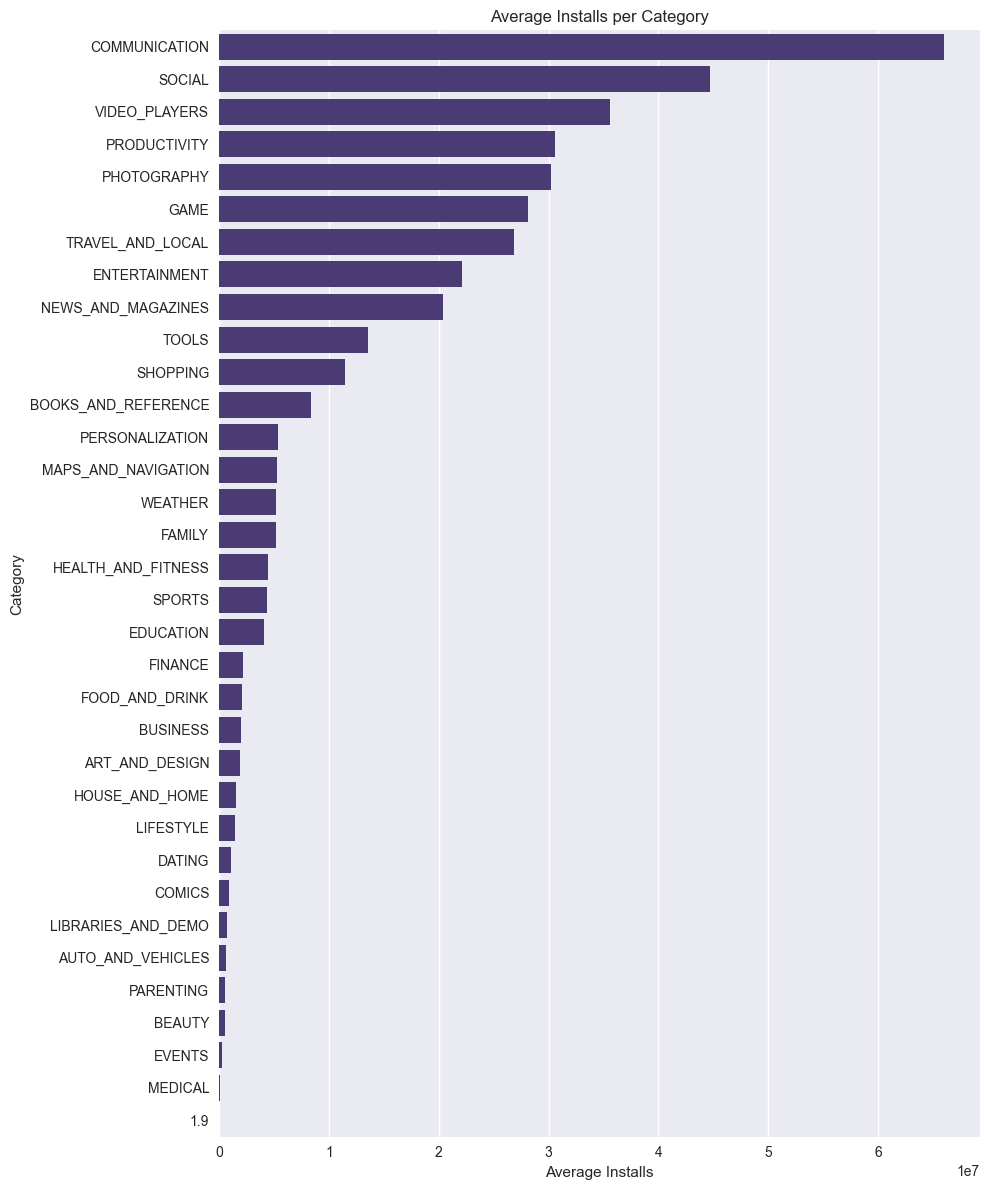

In [22]:
avg_installs = df_clean.groupby("Category")["Installs"].mean().sort_values(ascending=False)

plt.figure(figsize=(10,12))
sns.barplot(x=avg_installs.values, y=avg_installs.index)
plt.title("Average Installs per Category")
plt.xlabel("Average Installs")
plt.tight_layout()
plt.savefig("plots/avg_installs_by_category.png", dpi=300, bbox_inches='tight')
plt.show()


Reviews vs Installs

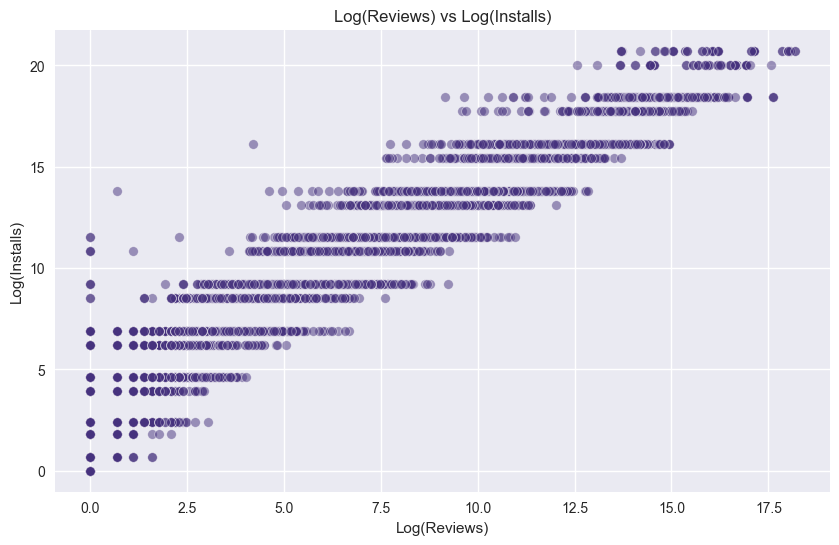

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_clean, 
    x=np.log1p(df_clean['Reviews']), 
    y=np.log1p(df_clean['Installs']),
    alpha=0.5
)
plt.title("Log(Reviews) vs Log(Installs)")
plt.xlabel("Log(Reviews)")
plt.ylabel("Log(Installs)")
plt.savefig("plots/reviews_vs_installs.png", dpi=300, bbox_inches='tight')
plt.show()


App Size vs Installs

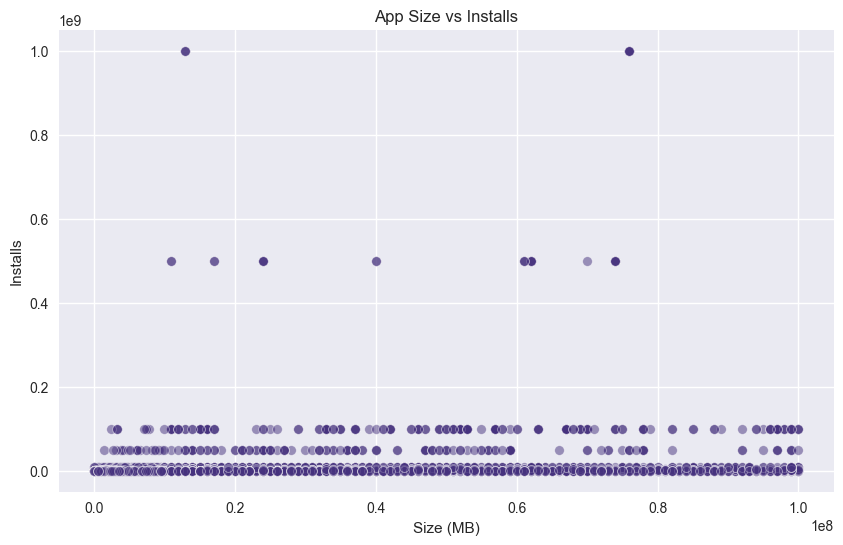

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_clean[df_clean['Size'] > 0],
    x='Size',
    y=df_clean[df_clean['Size'] > 0]['Installs'],
    alpha=0.5
)
plt.title("App Size vs Installs")
plt.xlabel("Size (MB)")
plt.ylabel("Installs")
plt.savefig("plots/size_vs_installs.png", dpi=300, bbox_inches='tight')
plt.show()


Category Competitiveness Heatmap

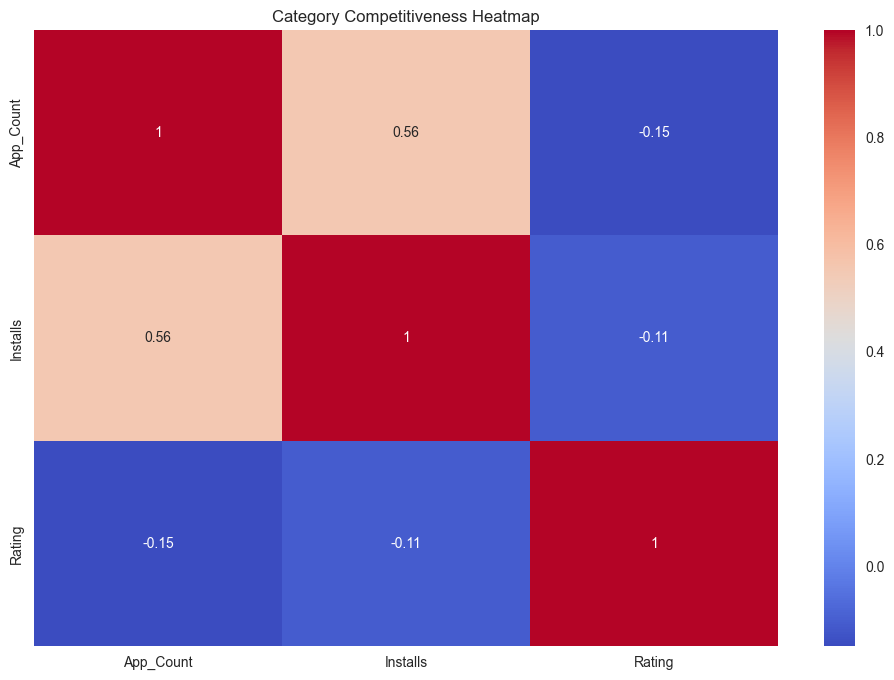

In [25]:
category_stats = df_clean.groupby("Category").agg({
    "App": "count",
    "Installs": "sum",
    "Rating": "mean"
}).rename(columns={"App": "App_Count"})

plt.figure(figsize=(12,8))
sns.heatmap(category_stats.corr(), annot=True, cmap="coolwarm")
plt.title("Category Competitiveness Heatmap")
plt.savefig("plots/category_competitiveness_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()


In [27]:
# Load the user reviews sentiment dataset
df_sentiment = pd.read_csv("googleplaystore_user_reviews.csv")

# Keep only useful columns
df_sentiment = df_sentiment[['App', 'Sentiment_Polarity']]

# Drop rows with missing polarity
df_sentiment.dropna(subset=['Sentiment_Polarity'], inplace=True)

df_sentiment.head()


,App,Sentiment_Polarity
0,10 Best Foods for You,1.00
1,10 Best Foods for You,0.25
3,10 Best Foods for You,0.40
4,10 Best Foods for You,1.00
5,10 Best Foods for You,1.00


Sentiment by Category (from user reviews)

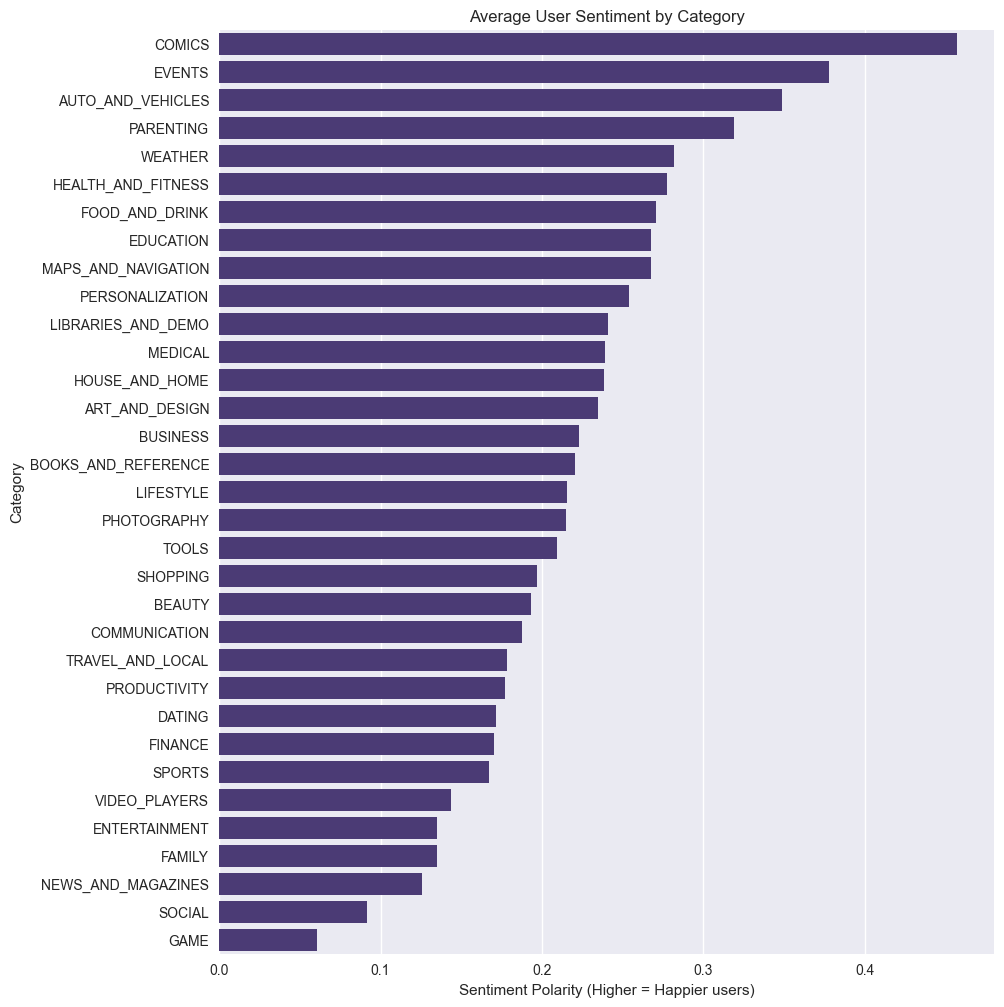

In [28]:
# Merge app data with sentiment data based on App name
merged = pd.merge(df_clean, df_sentiment, on="App", how="inner")

sentiment_by_category = merged.groupby("Category")["Sentiment_Polarity"].mean().sort_values(ascending=False)

plt.figure(figsize=(10,12))
sns.barplot(x=sentiment_by_category.values, y=sentiment_by_category.index)
plt.title("Average User Sentiment by Category")
plt.xlabel("Sentiment Polarity (Higher = Happier users)")
plt.savefig("plots/sentiment_by_category.png", dpi=300, bbox_inches='tight')
plt.show()


Save Cleaned Dataset

In [29]:
# Save the cleaned dataset
df_clean.to_csv("googleplay_cleaned.csv", index=False)
print("Cleaned dataset saved as googleplay_cleaned.csv")



Cleaned dataset saved as googleplay_cleaned.csv
